# DEEPAK M
#grip21

# Prediction using unsupervised Machine Learning

# Import libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline


# Import datset

In [9]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


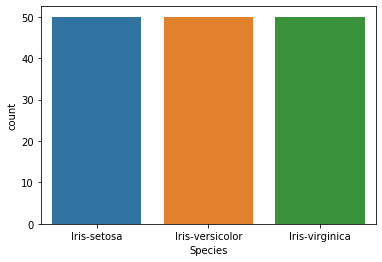

In [10]:
sns.countplot(df['Species'])

We can see that each class is in equal proprtion so there is no class imbalance problem

# Describe the data

In [11]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [13]:
df=df.drop('Id',axis=1)

In [14]:
x=df.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

# Identifying the right the number of clusters

In [17]:
sqerrors=[]
for i in range(1,21):
    model=KMeans(n_clusters=i,random_state=42)
    model.fit(x)
    sqerrors.append(model.inertia_)

([<matplotlib.axis.XTick at 0x295bb3ee748>,
 <a list of 21 Text xticklabel objects>)

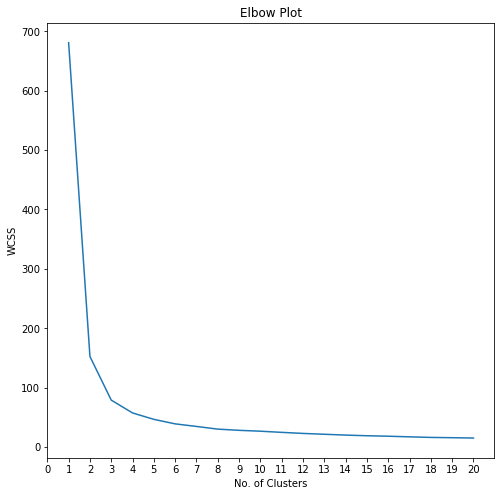

In [25]:
plt.figure(figsize=(8,8))
plt.plot(list(range(1,21)),sqerrors)
plt.title('Elbow Plot')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.xticks(ticks=list(range(21)))

From the figuure it is clear that optimum number of clusters is eual to 3

# Final Modelling

In [28]:
finalmodel=KMeans(n_clusters=3,random_state=42)
labels=finalmodel.fit_predict(x)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [29]:
clustercentre=finalmodel.cluster_centers_
clustercentre

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

# Visualising the clusters 

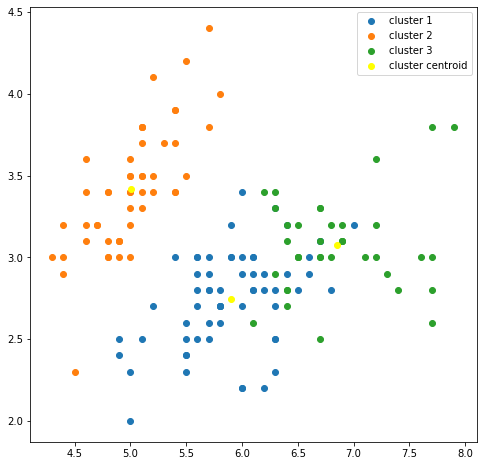

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(x[labels==0,0],x[labels==0,1],label='cluster 1')
plt.scatter(x[labels==1,0],x[labels==1,1],label='cluster 2')
plt.scatter(x[labels==2,0],x[labels==2,1],label='cluster 3')
plt.scatter(clustercentre[:,0],clustercentre[:,1],color='yellow',label='cluster centroid')
plt.legend()

# Training on scaled data

we know that kmeans is a distance based algorithm, so there is a chance of misgrouping of data beacuse of its differnt scale,so we can train the data and scale it on a new model

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

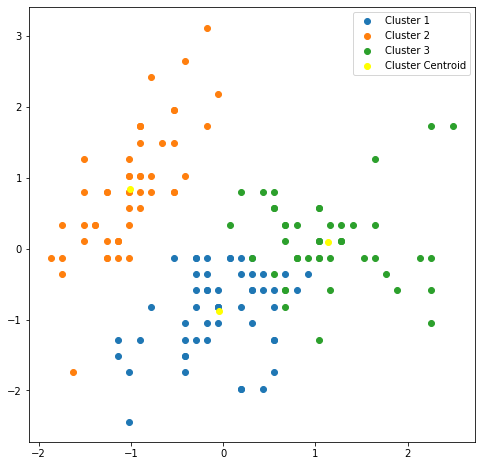

In [37]:
modelscaled=KMeans(n_clusters=3)
preds=modelscaled.fit_predict(x_scaled)
plt.figure(figsize=(8,8))
plt.scatter(x_scaled[preds==0,0],x_scaled[preds==0,1],label='Cluster 1')
plt.scatter(x_scaled[preds==1,0],x_scaled[preds==1,1],label='Cluster 2')
plt.scatter(x_scaled[preds==2,0],x_scaled[preds==2,1],label='Cluster 3')
plt.scatter(modelscaled.cluster_centers_[:,0],modelscaled.cluster_centers_[:,1],c='yellow',label='Cluster Centroid')
plt.legend()